Importing required libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Loading the data as df

In [40]:
df=pd.read_csv('/content/data.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


Selecting relevant features and the target variable

In [55]:
features = ['sqft_living']
target = 'price'

Drop rows with missing values in the selected columns

In [56]:
df= df.dropna(subset=features + [target])

Splitting the dataset into features (X) and target (y)

In [57]:
X = df[features]
y = df[target]

Splitting the data into training and testing sets

In [58]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Initializing and training the linear regression model

In [59]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Making predictions on the test set

In [60]:
y_pred=model.predict(x_test)

Evaluating the model

In [61]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [62]:
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 990204087727.1417
R² Score: 0.029065410341410414


In [63]:
model.coef_

array([267.22365824])

In [64]:
model.intercept_

-26048.2093954297

plotting the best fit line

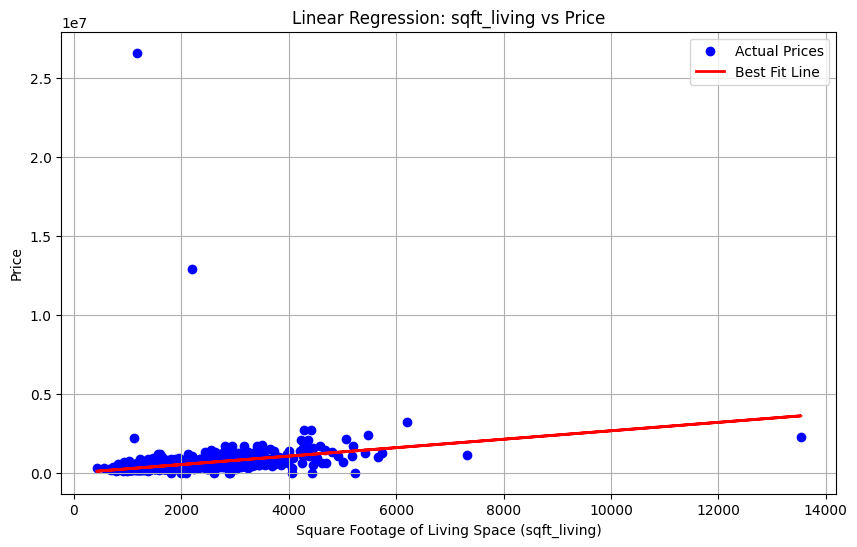

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual Prices')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.title('Linear Regression: sqft_living vs Price')
plt.xlabel('Square Footage of Living Space (sqft_living)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()